In [1]:
import networkx as nx
import string
import matplotlib.pyplot as plt
from prettytable import PrettyTable
%matplotlib inline  

##We will use the networkx code to contruct the graph
https://networkx.github.io/documentation/latest/examples/algorithms/davis_club.html

In [2]:
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al
in the 1930s.  They represent observed attendance at 14 social events
by 18 Southern women.  The graph is bipartite (clubs, women).

Data from:
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
__date__ = "$Date: 2005-05-12 14:33:11 -0600 (Thu, 12 May 2005) $"
__credits__ = """"""
__revision__ = "$Revision: 998 $"
#    Copyright (C) 2004 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

def davis_club_graph(create_using=None, **kwds):
    nwomen=14
    nclubs=18
    G=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    G.clear()
    G.name="Davis Southern Club Women"

    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

    davisdat="""\
1 1 1 1 1 1 0 1 1 0 0 0 0 0
1 1 1 0 1 1 1 1 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1 0 0 0 0 0
1 0 1 1 1 1 1 1 0 0 0 0 0 0
0 0 1 1 1 0 1 0 0 0 0 0 0 0
0 0 1 0 1 1 0 1 0 0 0 0 0 0
0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 1 0 1 1 0 0 0 0 0
0 0 0 0 1 0 1 1 1 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 1 1
0 0 0 0 0 0 1 1 1 1 0 1 1 1
0 0 0 0 0 1 1 0 1 1 1 1 1 1
0 0 0 0 0 0 1 1 0 1 1 1 1 1
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0"""


    # women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # club names
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1

    # parse matrix
    row=0
    for line in davisdat.split('\n'):
        thisrow=list(map(int,line.split(' ')))
        for col in range(0,len(thisrow)):
            if thisrow[col]==1:
                G.add_edge(w[row],c[col])
        row+=1
    return (G,list(w.values()),list(c.values()))

def project(B,pv,result=False,**kwds):
    """
    Returns a graph that is the unipartite projection of the
    bipartite graph B onto the set of nodes given in list pv.

    The nodes retain their names and are connected if they share a
    common node in the vertex set of {B not pv}.

    No attempt is made to verify that the input graph B is bipartite.
    """
    if result:
        G=result
    else:
        G=nx.Graph(**kwds)
    for v in pv:
        G.add_node(v)
        for cv in B.neighbors(v):
            G.add_edges_from([(v,u) for u in B.neighbors(cv)])
    return G

In [3]:
# return graph and women and clubs lists
(G,women,clubs)=davis_club_graph()

# project bipartite graph onto women nodes
W=project(G,women)
# project bipartite graph onto club nodes
C=project(G,clubs)

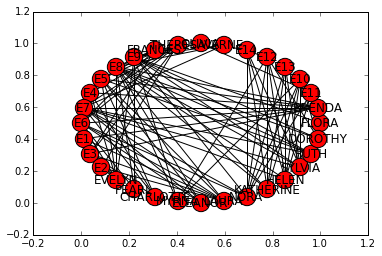

In [4]:
nx.draw_networkx(G,with_labels=True,pos=nx.circular_layout(G))

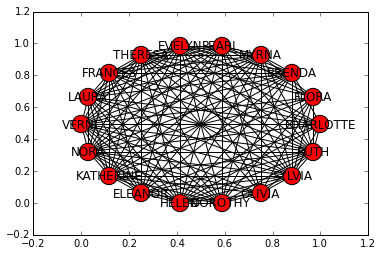

In [5]:
nx.draw_networkx(W,with_labels=True,pos=nx.circular_layout(W))

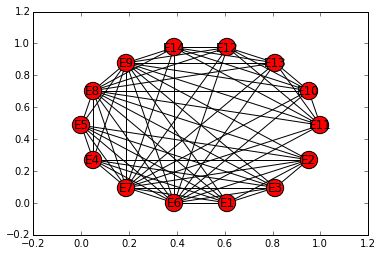

In [6]:
nx.draw_networkx(C,with_labels=True, pos=nx.circular_layout(C))

####The Women's graph seems to imply that all of the women are connected to each other, that is that all of the women share atleast one group in common.  We can check this below:

In [7]:
for i in W.nodes_iter():
    if (len(W.neighbors(i))) != 18:
        print i + " --- " + str(len(W.neighbors(i)))

CHARLOTTE --- 12
FLORA --- 13
BRENDA --- 16
MYRNA --- 17
PEARL --- 17
FRANCES --- 16
LAURA --- 16
KATHERINE --- 17
ELEANOR --- 16
DOROTHY --- 17
OLIVIA --- 13


####So not all the women are connected to each other, can we use centrality measures to see who is most/least important?

In [8]:
def createTable(graph):
    deg=nx.degree(graph)
    deg_cent=nx.degree_centrality(graph)
    bet_cent=nx.betweenness_centrality(graph)
    clo_cent=nx.closeness_centrality(graph)
    eig_cent = nx.eigenvector_centrality(graph)
    table=[[name,deg[name],round(deg_cent[name],4),round(bet_cent[name],4),round(clo_cent[name],4),round(eig_cent[name],4)] for name in graph.nodes()]
    table=sorted(table,key=lambda x: -x[2])
    t = PrettyTable(['Name','Degree','Degree Cent','Betweenness','Closeness','EigenCent'])
    for i in range(0, len(table)):
        t.add_row(table[i])
    return t

In [9]:
print(createTable(W))

+-----------+--------+-------------+-------------+-----------+-----------+
|    Name   | Degree | Degree Cent | Betweenness | Closeness | EigenCent |
+-----------+--------+-------------+-------------+-----------+-----------+
|   EVELYN  |   19   |    1.1176   |    0.0101   |    1.0    |   0.2535  |
|  THERESA  |   19   |    1.1176   |    0.0101   |    1.0    |   0.2535  |
|   VERNE   |   19   |    1.1176   |    0.0101   |    1.0    |   0.2535  |
|    NORA   |   19   |    1.1176   |    0.0101   |    1.0    |   0.2535  |
|   HELEN   |   19   |    1.1176   |    0.0101   |    1.0    |   0.2535  |
|   SYLVIA  |   19   |    1.1176   |    0.0101   |    1.0    |   0.2535  |
|    RUTH   |   19   |    1.1176   |    0.0101   |    1.0    |   0.2535  |
|   MYRNA   |   18   |    1.0588   |    0.0053   |   0.9444  |   0.2432  |
|   PEARL   |   18   |    1.0588   |    0.0053   |   0.9444  |   0.2432  |
| KATHERINE |   18   |    1.0588   |    0.0053   |   0.9444  |   0.2432  |
|  DOROTHY  |   18   |   

#####Due to self-loops, all names are connected to themselves.  We can also see that there are 7 women who are most important and 3 who are least important (in the sense of how many other women they possibly know).   Thus, if we wanted to get a message to all of the women, which club should we broadcast to assuming that the women will propagate the idea?

In [10]:
print(createTable(C))

+------+--------+-------------+-------------+-----------+-----------+
| Name | Degree | Degree Cent | Betweenness | Closeness | EigenCent |
+------+--------+-------------+-------------+-----------+-----------+
|  E9  |   15   |    1.1538   |    0.0801   |    1.0    |   0.3393  |
|  E8  |   15   |    1.1538   |    0.0801   |    1.0    |   0.3393  |
|  E7  |   15   |    1.1538   |    0.0801   |    1.0    |   0.3393  |
|  E6  |   15   |    1.1538   |    0.0801   |    1.0    |   0.3393  |
| E11  |   10   |    0.7692   |     0.0     |   0.7222  |   0.2323  |
| E10  |   10   |    0.7692   |     0.0     |   0.7222  |   0.2323  |
| E13  |   10   |    0.7692   |     0.0     |   0.7222  |   0.2323  |
| E12  |   10   |    0.7692   |     0.0     |   0.7222  |   0.2323  |
| E14  |   10   |    0.7692   |     0.0     |   0.7222  |   0.2323  |
|  E5  |   10   |    0.7692   |     0.0     |   0.7222  |   0.2323  |
|  E4  |   10   |    0.7692   |     0.0     |   0.7222  |   0.2323  |
|  E1  |   10   |   

#####With the clubs, we can see that clubs E6-E9 have members in common with all other clubs and thus have the greatest reach

In [25]:
def getneigh(W,G):
    for i in W.nodes_iter():
        print i + " --- " + str(len(G.neighbors(i))) + " --- " + str(G.neighbors(i))

In [26]:
getneigh(W,G)

CHARLOTTE --- 4 --- ['E5', 'E4', 'E7', 'E3']
FLORA --- 2 --- ['E11', 'E9']
BRENDA --- 7 --- ['E8', 'E5', 'E4', 'E7', 'E6', 'E1', 'E3']
MYRNA --- 4 --- ['E10', 'E12', 'E9', 'E8']
PEARL --- 3 --- ['E6', 'E9', 'E8']
EVELYN --- 8 --- ['E9', 'E8', 'E5', 'E4', 'E6', 'E1', 'E3', 'E2']
THERESA --- 8 --- ['E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E3', 'E2']
FRANCES --- 4 --- ['E5', 'E6', 'E8', 'E3']
LAURA --- 7 --- ['E8', 'E5', 'E7', 'E6', 'E1', 'E3', 'E2']
VERNE --- 4 --- ['E7', 'E12', 'E9', 'E8']
NORA --- 8 --- ['E11', 'E10', 'E13', 'E12', 'E14', 'E9', 'E7', 'E6']
KATHERINE --- 6 --- ['E10', 'E13', 'E12', 'E14', 'E9', 'E8']
ELEANOR --- 4 --- ['E5', 'E7', 'E6', 'E8']
HELEN --- 7 --- ['E11', 'E10', 'E13', 'E12', 'E14', 'E8', 'E7']
DOROTHY --- 4 --- ['E10', 'E12', 'E9', 'E8']
OLIVIA --- 2 --- ['E11', 'E9']
SYLVIA --- 7 --- ['E10', 'E13', 'E12', 'E14', 'E9', 'E8', 'E7']
RUTH --- 4 --- ['E5', 'E7', 'E9', 'E8']


In [27]:
getneigh(C,G)

E11 --- 4 --- ['NORA', 'FLORA', 'OLIVIA', 'HELEN']
E10 --- 6 --- ['MYRNA', 'NORA', 'KATHERINE', 'HELEN', 'DOROTHY', 'SYLVIA']
E13 --- 4 --- ['SYLVIA', 'KATHERINE', 'NORA', 'HELEN']
E12 --- 7 --- ['MYRNA', 'VERNE', 'NORA', 'KATHERINE', 'HELEN', 'DOROTHY', 'SYLVIA']
E14 --- 4 --- ['SYLVIA', 'KATHERINE', 'NORA', 'HELEN']
E9 --- 12 --- ['FLORA', 'MYRNA', 'PEARL', 'EVELYN', 'THERESA', 'VERNE', 'NORA', 'KATHERINE', 'DOROTHY', 'OLIVIA', 'SYLVIA', 'RUTH']
E8 --- 14 --- ['VERNE', 'MYRNA', 'BRENDA', 'PEARL', 'EVELYN', 'THERESA', 'FRANCES', 'LAURA', 'ELEANOR', 'KATHERINE', 'HELEN', 'DOROTHY', 'SYLVIA', 'RUTH']
E5 --- 8 --- ['CHARLOTTE', 'BRENDA', 'EVELYN', 'THERESA', 'FRANCES', 'LAURA', 'ELEANOR', 'RUTH']
E4 --- 4 --- ['EVELYN', 'THERESA', 'BRENDA', 'CHARLOTTE']
E7 --- 10 --- ['CHARLOTTE', 'BRENDA', 'VERNE', 'THERESA', 'LAURA', 'ELEANOR', 'NORA', 'HELEN', 'SYLVIA', 'RUTH']
E6 --- 8 --- ['BRENDA', 'PEARL', 'EVELYN', 'THERESA', 'FRANCES', 'LAURA', 'ELEANOR', 'NORA']
E1 --- 3 --- ['LAURA', 'EVELYN',

####Even though Club 'E6' has the 8 members, it's centralities are high.  And even though Ruth and Verne are only part of 4 clubs, they both have higher centralities that others who are part of more clubs 

####I think we can conclude that Ruth and Verne are the most important people (in terms of connectivity) as they have access to the all the other women while being part of the least amount of clubs.